Graph has 5451 nodes and 39381 edges.


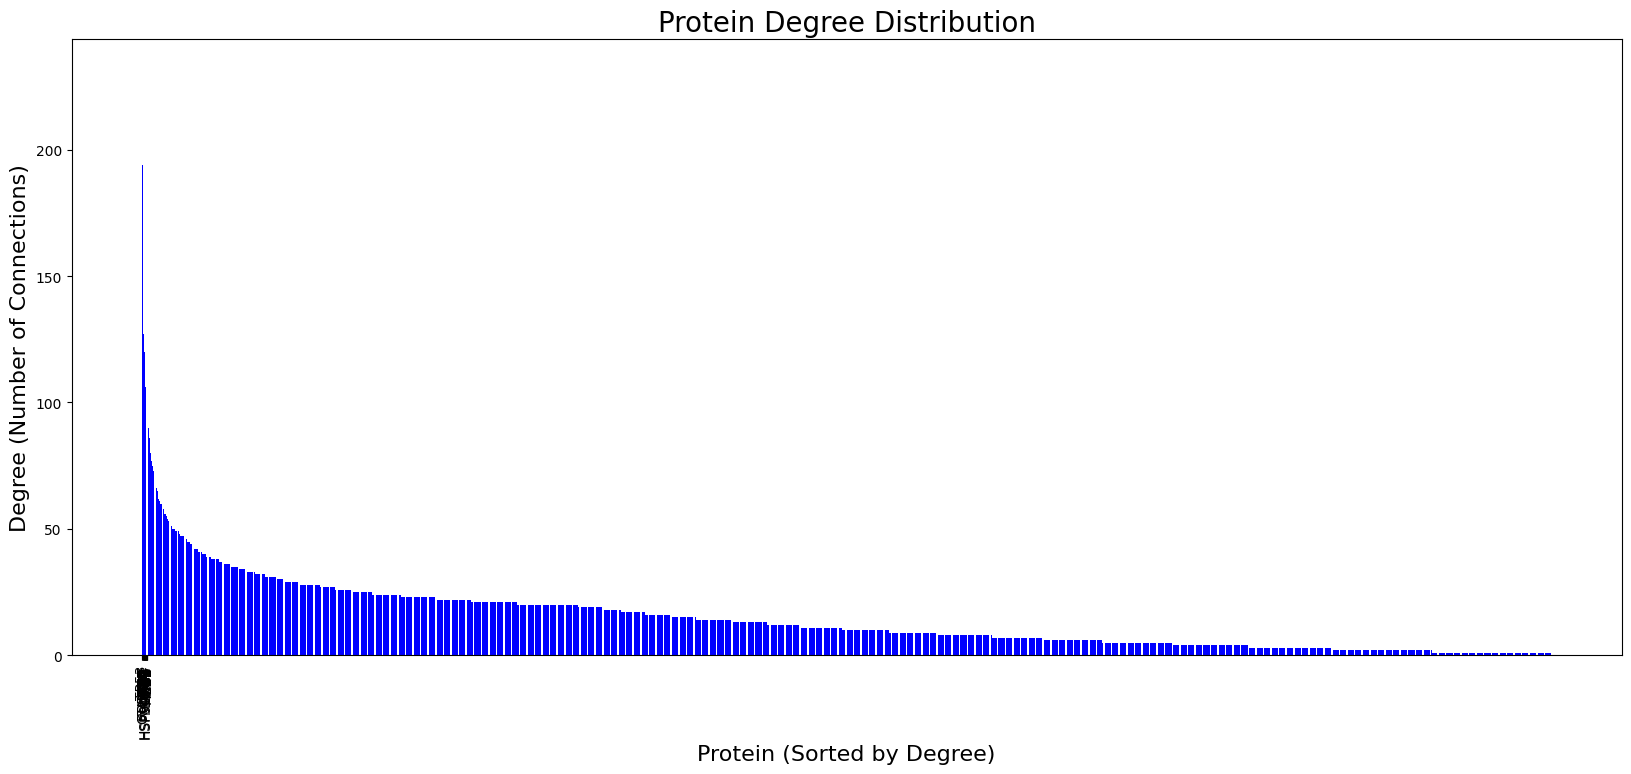

Top 10 Hub Proteins:
['TP53', 'EGFR', 'RPS27A', 'CTNNB1', 'UBC', 'SRC', 'IL6', 'IFNG', 'TNF', 'FN1']


In [2]:
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load our clean edge list
edges_df = pd.read_csv('../data/02-preprocessed/protein_edges_clean.csv', header=None, names=['protein1', 'protein2'])

# Create a graph object using networkx
G = nx.from_pandas_edgelist(edges_df, 'protein1', 'protein2')

print(f"Graph has {G.number_of_nodes()} nodes and {G.number_of_edges()} edges.")

# --- Degree Plot ---
degrees = [val for (node, val) in G.degree()]
degree_counts = sorted(degrees, reverse=True)
protein_names_sorted = [item[0] for item in sorted(G.degree(), key=lambda x: x[1], reverse=True)]

plt.figure(figsize=(20, 8))
plt.bar(range(G.number_of_nodes()), degree_counts, width=0.80, color='b')
plt.title('Protein Degree Distribution', fontsize=20)
plt.ylabel('Degree (Number of Connections)', fontsize=16)
plt.xlabel('Protein (Sorted by Degree)', fontsize=16)
# Let's just label the top 20 most connected proteins to keep the x-axis readable
plt.xticks(range(20), protein_names_sorted[:20], rotation=90)
plt.show()

print("Top 10 Hub Proteins:")
print(protein_names_sorted[:10])

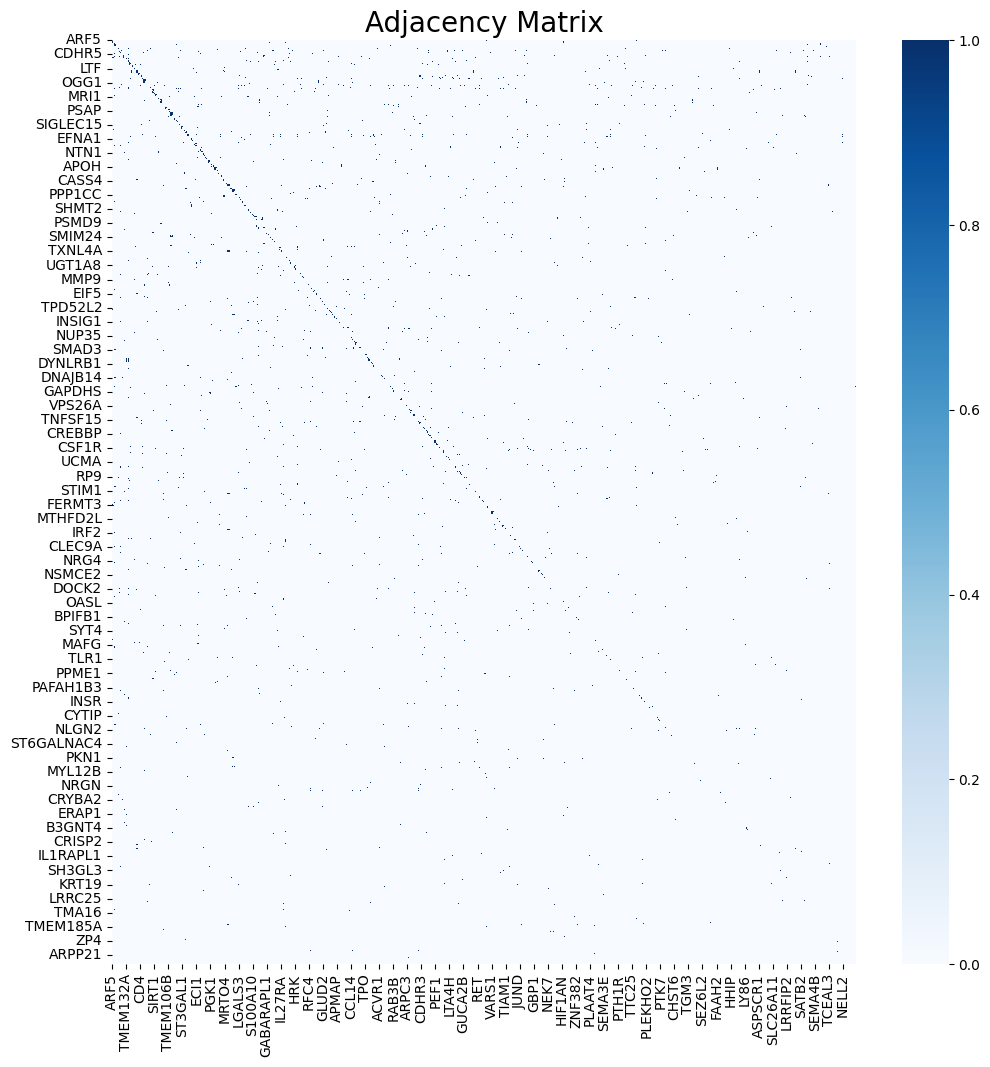

Generating clustered adjacency matrix... (this may take a minute for a large graph)


/usr/local/lib/python3.11/site-packages/seaborn/matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)
/usr/local/lib/python3.11/site-packages/seaborn/matrix.py:530: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  linkage = hierarchy.linkage(self.array, method=self.method,
/usr/local/lib/python3.11/site-packages/seaborn/matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)
/usr/local/lib/python3.11/site-packages/seaborn/matrix.py:530: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  linkage = hierarchy.linkage(self.array, method=self.method,


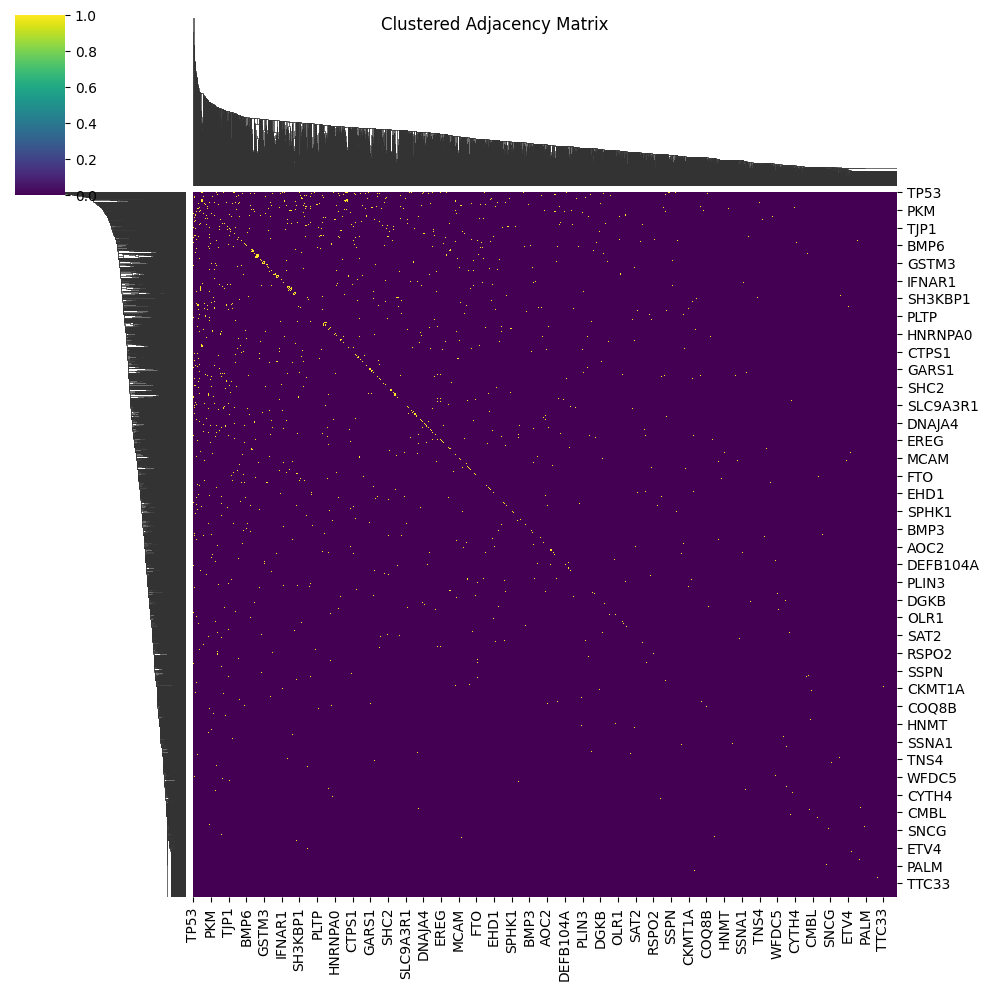

In [3]:

# Get the adjacency matrix
adj_matrix = nx.to_pandas_adjacency(G)

# Plot a simple heatmap (will be huge and maybe not super informative without ordering)
plt.figure(figsize=(12, 12))
sns.heatmap(adj_matrix, cmap='Blues')
plt.title('Adjacency Matrix', fontsize=20)
plt.show()

# --- Clustered Adjacency Matrix (More Sophisticated) ---
# Use seaborn's clustermap to reorder the rows and columns to reveal structure
print("Generating clustered adjacency matrix... (this may take a minute for a large graph)")
g = sns.clustermap(adj_matrix, cmap='viridis')
g.fig.suptitle('Clustered Adjacency Matrix')
plt.show()


Visualizing Subgraph for Cluster 0 (139 nodes, 21 edges)


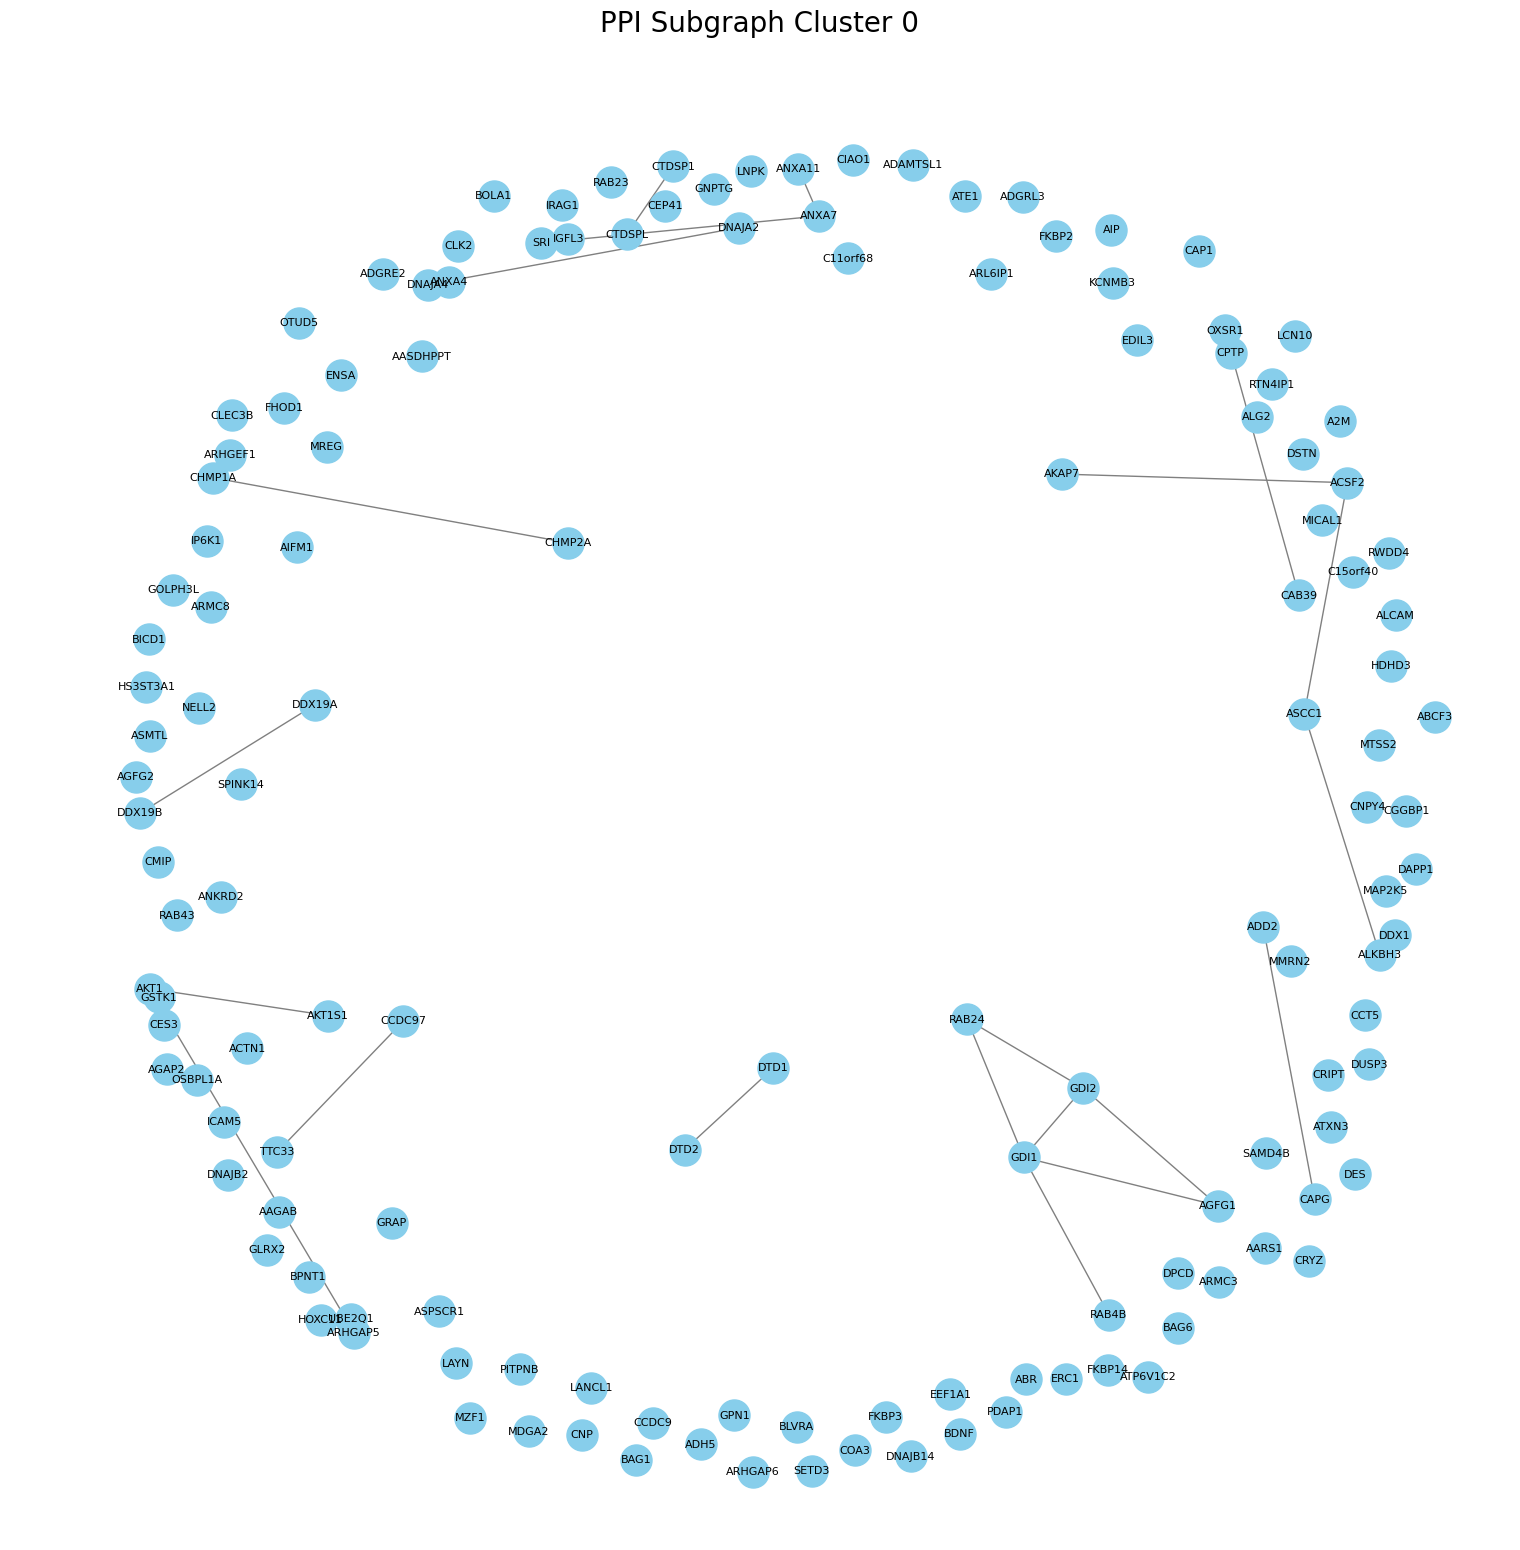

In [6]:
# First, load your cluster results
clusters_df = pd.read_csv('../data/04-predictions/protein_clusters.csv')

# Get the list of genes for a specific cluster, e.g., Cluster 0
cluster_0_genes = clusters_df[clusters_df['Cluster'] == 'Cluster 0']['GeneSymbol'].tolist()

# Create a subgraph containing only the nodes from Cluster 0 and the edges between them
subgraph = G.subgraph(cluster_0_genes)

print(f"\nVisualizing Subgraph for Cluster 0 ({subgraph.number_of_nodes()} nodes, {subgraph.number_of_edges()} edges)")

plt.figure(figsize=(15, 15))
# Use a layout algorithm to position the nodes
pos = nx.spring_layout(subgraph, k=0.5, iterations=50) 
nx.draw(subgraph, pos, with_labels=True, node_color='skyblue', node_size=500, font_size=8, edge_color='gray')
plt.title('PPI Subgraph Cluster 0', fontsize=20)
plt.show()